# Principal Component Analysis

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.decomposition import PCA

## Part I - Implementing PCA


1. Create a new notebook, and load the digits dataset from scikit-learn. Visualize a few of the samples by reshaping the data appropriately.

In [38]:
digits = datasets.load_digits()
#print(digits.DESCR)
X=digits.data 
y=digits.target

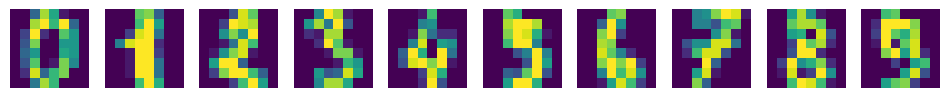

In [39]:
fig, axes = plt.subplots(1, len(np.unique(y)), figsize=(12, 12))
for i in range(len(np.unique(y))):
    axes[i].imshow(X[i].reshape(8, 8))
    axes[i].axis('off')
plt.show()

2. Apply PCA using the scikit implementation. Keep only the first two principal components. Visualize the PCA projections with a scatter plot

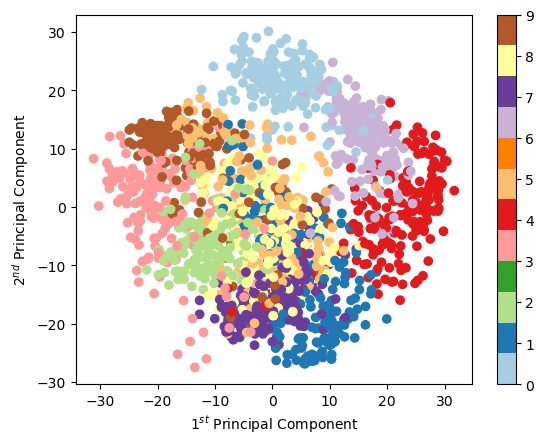

In [40]:
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.xlabel("$1^{st}$ Principal Component")
plt.ylabel("$2^{nd}$ Principal Component")
plt.colorbar()
plt.show()

3. Implement PCA by performing eigenanalysis on the covariance matrix. Keep only the first two principal components, and visualize the projections in 2D as above.

In [41]:
mean = np.mean(digits.data, axis=0)
data_std = digits.data - mean

cov_matrix = np.cov(data_std.T)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted= eigenvectors[:, sorted_indices]

eigenvectors_2 = eigenvectors_sorted[:, :2]

proj_manual = np.dot(data_std,eigenvectors_2)

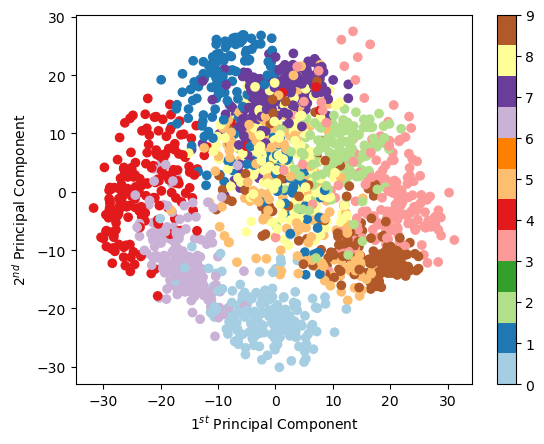

In [42]:
plt.scatter(proj_manual[:, 0], proj_manual[:, 1], c=digits.target, cmap="Paired")
plt.xlabel("$1^{st}$ Principal Component")
plt.ylabel("$2^{nd}$ Principal Component")
plt.colorbar()
plt.show()

4. Implement PCA by performing SVD on the data matrix, and then repeat the step above for visualization.

In [43]:
mean = np.mean(digits.data, axis=0)
data_std = digits.data - mean

U, S, Vt = np.linalg.svd(data_std)

vectors_2 = Vt.T[:, :2]

proj_svd = np.dot(data_std, vectors_2)

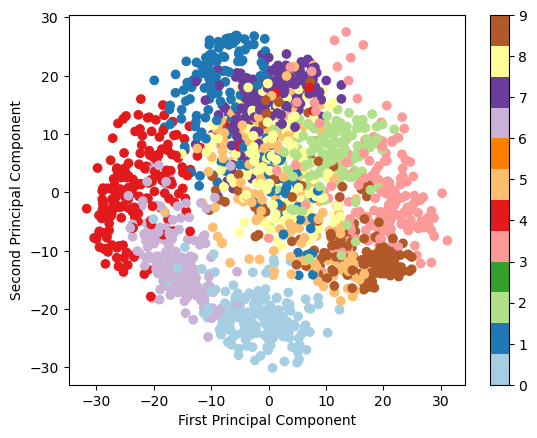

In [44]:
plt.scatter(proj_svd[:, 0], proj_svd[:, 1], c=digits.target, cmap="Paired")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.colorbar()
plt.show()

5. Compare the variance explained in the three implementations for the first two components. You can use the explaned_variance_ratio for the scikit learn implementation. Otherwise you can use the ratio of eigenvalues kept over the sum of all eigenvalues, and analogously for singular values.

In [45]:
# Sklearn
sklearn_ratio = pca.explained_variance_ratio_
print("Scikit-learn variance ratio:", sklearn_ratio)

# Eigenanalysis
eigenvalues_sum = np.sum(eigenvalues)
eigen_ratio = np.array([eigenvalues[sorted_indices[i]] / eigenvalues_sum for i in range(2)])
print("Eigenanalysis variance ratio:", eigen_ratio)

# SVD
singular_values_sum = np.sum(S)
svd_ratio = np.array([(S[i] ** 2) / (singular_values_sum ** 2) for i in range(2)])
print("SVD variance ratio:", svd_ratio)


Scikit-learn variance ratio: [0.14890594 0.13618771]
Eigenanalysis variance ratio: [0.14890594 0.13618771]
SVD variance ratio: [0.00481003 0.0043992 ]


## Part II - Noise and Dimensionality Reduction

1. Load the digits dataset

In [46]:
digits = datasets.load_digits()
#print(digits.DESCR)
X=digits.data 
y=digits.target

2. Use the code below to visualize 40 samples from the digits dataset

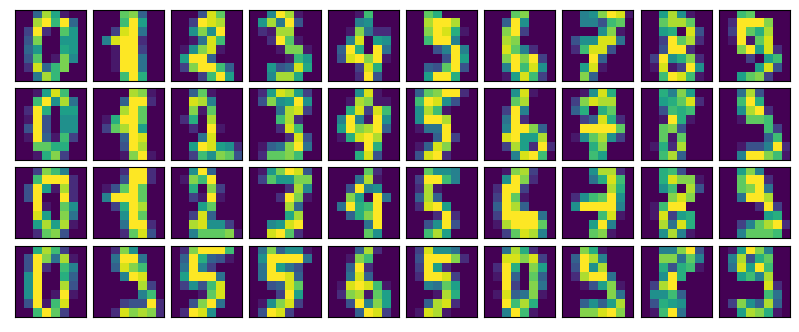

In [47]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8))
        
plot_digits(digits.data)

3. Add some noise

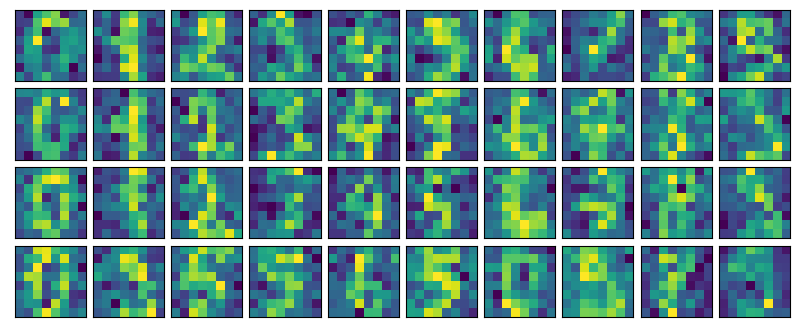

In [48]:
digits.data = digits.data+np.random.normal(0,4,digits.data.shape) 
plot_digits(digits.data)

4. Fit the scikit-learn implementation of PCA on the data, and plot the cumulative variance explained, with the horizontal axis being the number of components.

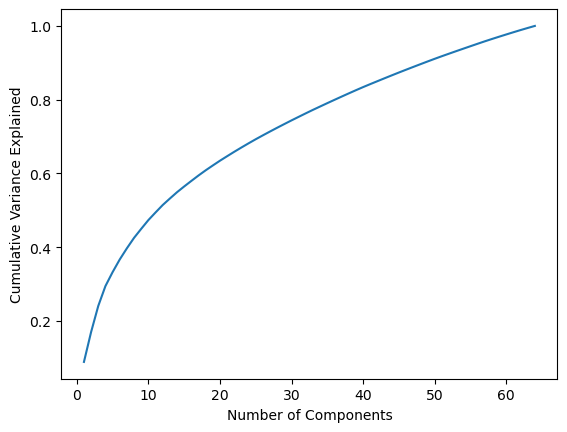

In [49]:
pca_all = PCA()
pca_all.fit(digits.data)

cumulative_variance = np.cumsum(pca_all.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.show()

5. Can you denoise the dataset by compressing and reconstructing via PCA, keeping only a proportion of
the components? Plot the reconstructed images to inspect for noise.

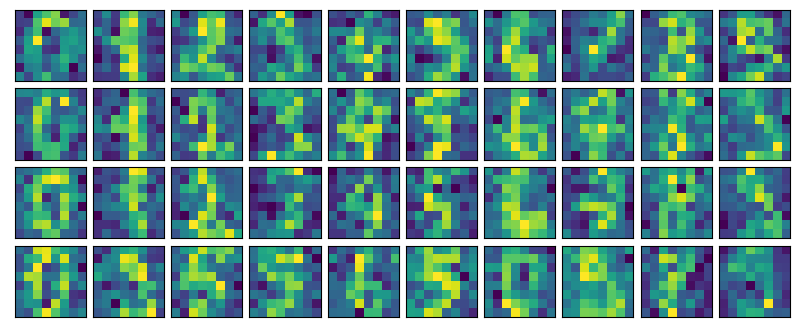

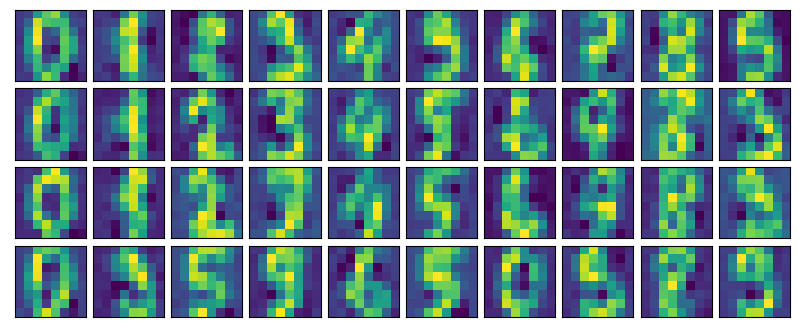

In [50]:
pca_denoise = PCA(n_components=0.5)  # Keep 50% of the total variance
proj_denoise = pca_denoise.fit_transform(digits.data)

reconstructed_data = pca_denoise.inverse_transform(proj_denoise)

plot_digits(digits.data)
plot_digits(reconstructed_data)

6. How many components did you end up keeping? How did you decide how many components to keep?

In [51]:
n_kept = pca_denoise.n_components_
print("Number of components kept:", n_kept)
print("We choose the number by inspecting the images")

Number of components kept: 12
We choose the number by inspecting the images


## Part III - Eigenfaces

1. Load the LFW dataset with scikit learn.

In [52]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

2. Write a similar function to plot_digits that visualizes the rst 20 samples of the dataset. Split the gure
into 2 rows with 10 samples each.

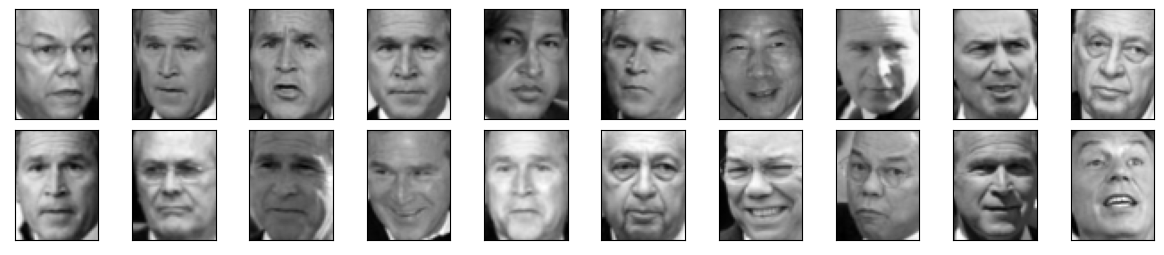

In [53]:
def plot_faces(data):
    fig, axes = plt.subplots(2, 10, figsize=(15, 3),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(62, 47), cmap='gray')
        
plot_faces(faces.images)

3. Apply the scikit-learn PCA on the dataset, and subsequently visualize the rst 24 eigenfaces. What do
you observe?

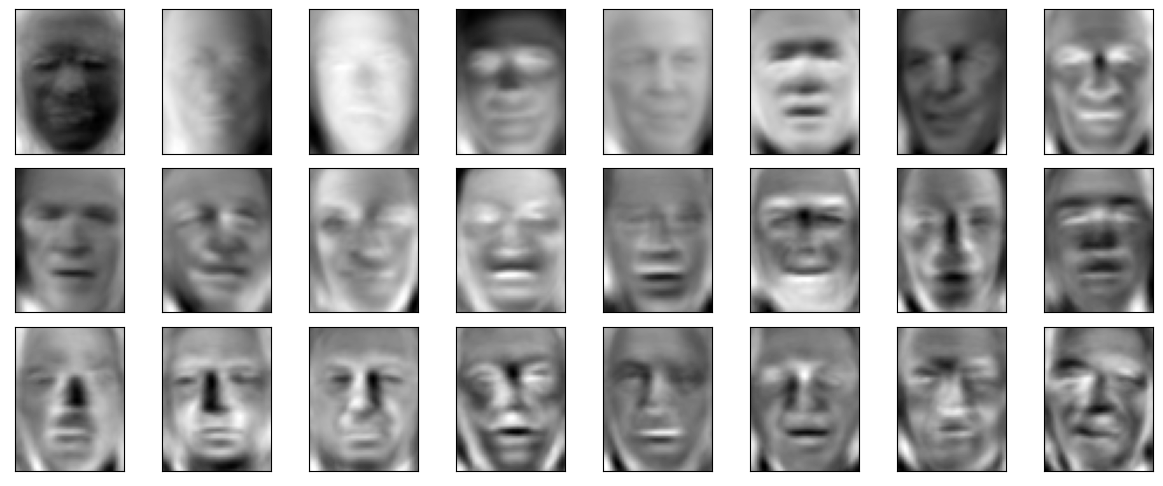

In [54]:
from sklearn.decomposition import PCA

n_samples, h, w = faces.images.shape
X = faces.data

n_components = 24
pca_faces = PCA(n_components=n_components, whiten=True)
pca_faces.fit(X)

def plot_eigenfaces(eigenfaces, h, w):
    fig, axes = plt.subplots(3, 8, figsize=(15, 6),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(eigenfaces[i].reshape(h, w), cmap='gray')

plot_eigenfaces(pca_faces.components_, h, w)


4. Plot the first 10 images of the dataset, and the reconstructions of those images via PCA.

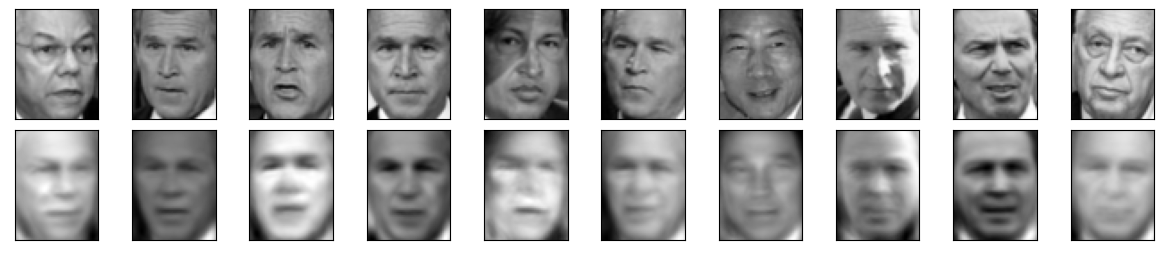

In [55]:

X_pca = pca_faces.transform(X)


X_reconstructed = pca_faces.inverse_transform(X_pca)

def plot_original_and_reconstructed(original_images, reconstructed_data, h, w, num_samples=10):
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 3),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    for i in range(num_samples):
        axes[0, i].imshow(original_images[i].reshape(h, w), cmap='gray')
        axes[1, i].imshow(reconstructed_data[i].reshape(h, w), cmap='gray')

plot_original_and_reconstructed(faces.images, X_reconstructed, h, w)


5. Assume you have only images of class 0 and 5. Without re-tting PCA, create a 3D scatter plot where
axes correspond to a principal direction recovered by PCA, and class information is also shown (e.g.,
via point color). Do this for components 0; 1; 2 and then 4; 5; 6. Which scatter plot (i.e. which set of
components) shows more promise in terms of clustering the two individuals?

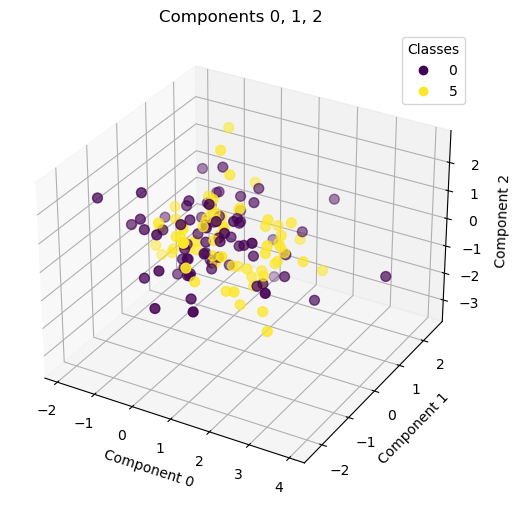

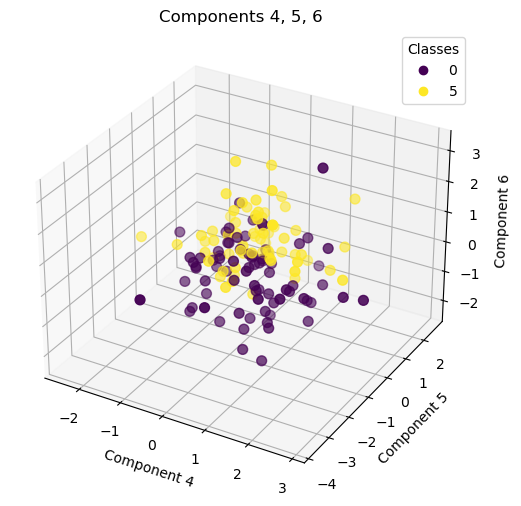

In [57]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


mask = np.isin(faces.target, [0, 5])
X_filtered = X[mask]
y_filtered = faces.target[mask]


X_filtered_pca = pca_faces.transform(X_filtered)


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_filtered_pca[:, 0], X_filtered_pca[:, 1], X_filtered_pca[:, 2],
                     c=y_filtered, cmap='viridis', s=50)
ax.set_xlabel("Component 0")
ax.set_ylabel("Component 1")
ax.set_zlabel("Component 2")
ax.set_title("Components 0, 1, 2")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

# Create a 3D scatter plot for components 4, 5, 6
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_filtered_pca[:, 4], X_filtered_pca[:, 5], X_filtered_pca[:, 6],
                     c=y_filtered, cmap='viridis', s=50)
ax.set_xlabel("Component 4")
ax.set_ylabel("Component 5")
ax.set_zlabel("Component 6")
ax.set_title("Components 4, 5, 6")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()
